# Capstone project-HR Employee Attrition - LR

In [ ]:
###### Reading the data

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_cap = pd.read_csv("D:/Datascience/Capstone/HR_Employee_Attrition_Data.csv")

In [5]:
data_cap.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7


In [4]:
#checking the shape of the data
data_cap.shape

(2940, 35)

In [3]:
#checking for dtypes
data_cap.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Exploratory data analysis

In [6]:
#check if there are any null values
data_cap.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

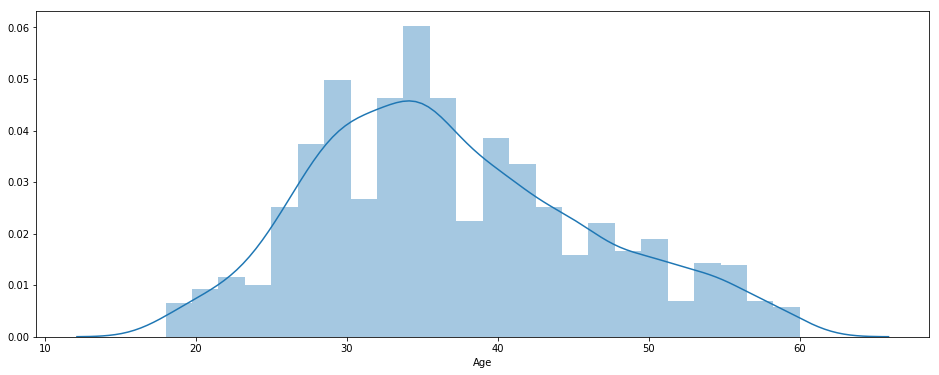

In [13]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(data_cap['Age'])
plt.show()

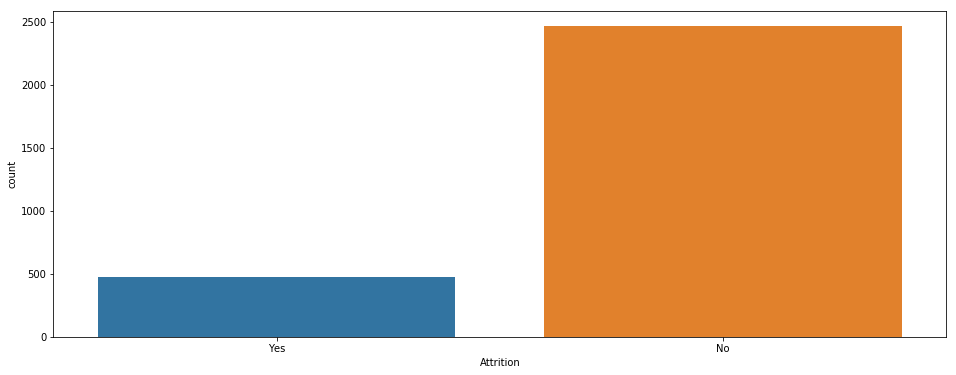

In [15]:
# Plot count of Attrition
plt.figure(figsize = (16,6))
sns.countplot('Attrition', data = data_cap)
plt.show()

In [32]:
#Calculate the attrition percentage
print("Attrition % in the org is::",(data_cap['Attrition'].value_counts()['Yes']/data_cap['Attrition'].count())*100)


Attrition % in the org is:: 16.122448979591837


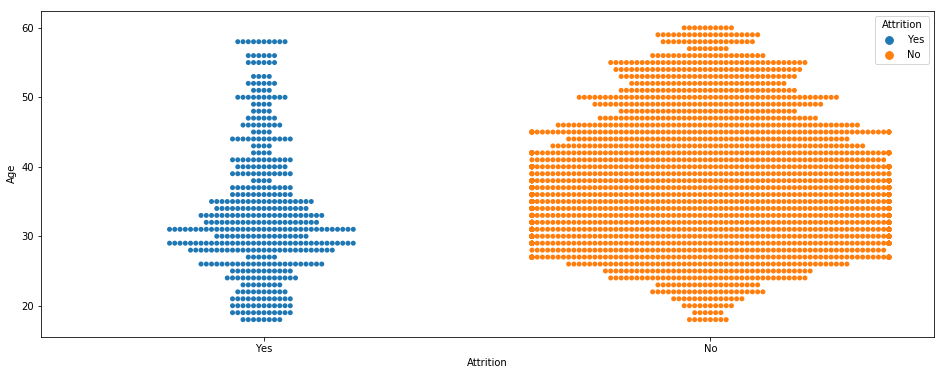

In [38]:
#Check to see if there is any relation b/w Age and Attrition
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Attrition', data = data_cap, hue = 'Attrition')
plt.show()
""""From the below plot we can see that there is NO linear relation between 'Age' and 'Attrition', 
but bulk of the attrition is happening between the age groups of '25-32'"""

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


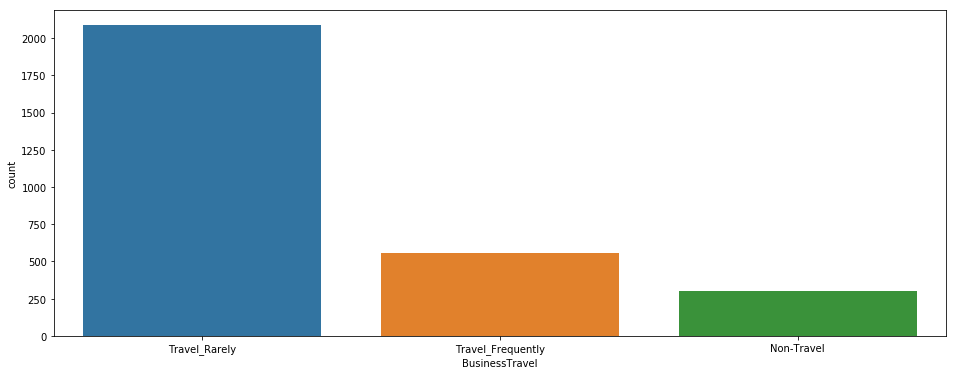

In [42]:
#Plotting the count by business travel
plt.figure(figsize = (16,6))
print(data_cap['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel', data = data_cap)
plt.show()

In [90]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
data_cap.loc[data_cap['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
data_cap.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,80,1,6,3,3,2,2,2,2,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,80,0,8,2,2,7,7,3,6,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,80,3,12,3,2,1,0,0,0,1
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,80,1,1,2,3,1,0,0,0,1
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,80,0,10,2,3,9,7,1,8,2
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,80,2,17,3,2,7,7,7,7,1


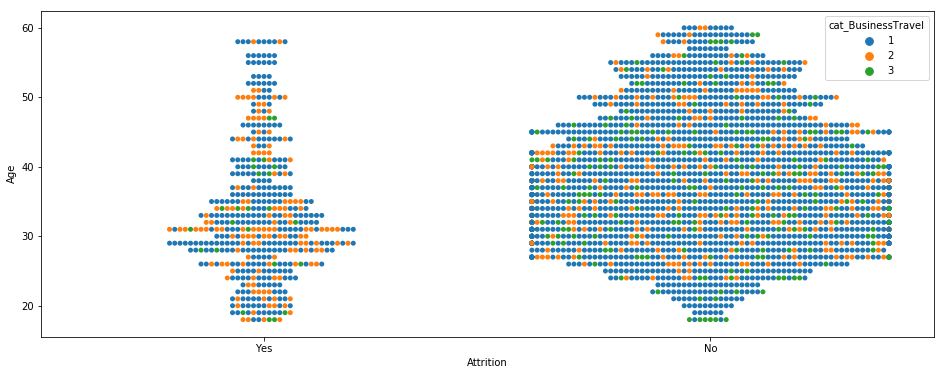

In [106]:
#Plotting Attrition for Age and business travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y='Age',  data = data_cap, hue = 'cat_BusinessTravel')
plt.show()

#Insight 1
"""From the below plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more"""

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


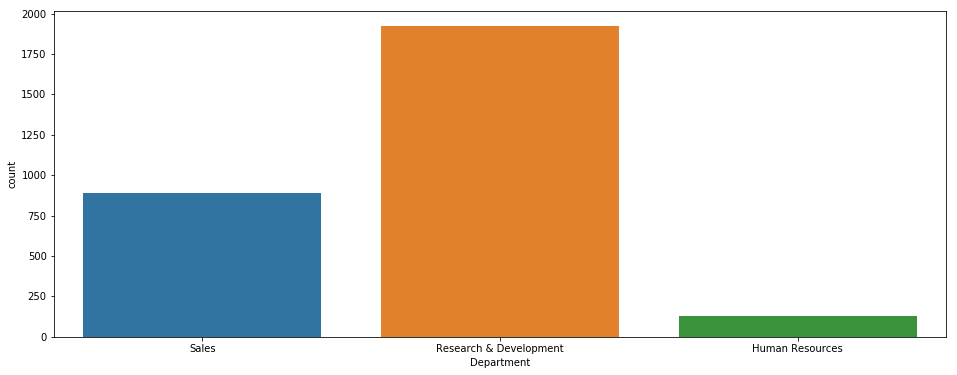

In [108]:
#Plotting counts for department
print(data_cap['Department'].value_counts())
plt.figure(figsize = (16,6))
sns.countplot(data_cap['Department'])
plt.show()

In [116]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
data_cap.loc[data_cap['Department'] == 'Sales', 'ord_Department'] = 1
data_cap.loc[data_cap['Department'] == 'Research & Development', 'ord_Department'] = 2
data_cap.loc[data_cap['Department'] == 'Human Resources', 'ord_Department'] = 3


In [377]:
#Getting the count of Business travel based on Department
#HR
departmentgrp = data_cap.groupby(by = 'Department')

df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [388]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
#df2.loc[df2['Department'] != 'HR', 'Department'] = 'R&D' 
df3 = df1.append(df2, ignore_index=True)
df3


,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D


In [389]:
df2 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,630,Sales
7,Travel_Frequently,168,Sales
8,Non-Travel,94,Sales


In [391]:
#Calculating % of frequent travel employees in Sales and R&D
print("% of frequent travel in Sales is::",(df4.loc[((df4['Department'] == 'Sales') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
print("% of frequent travel in R&D is ::",(df4.loc[((df4['Department'] == 'R&D') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))


% of frequent travel in Sales is:: 0.18834080717488788
% of frequent travel in R&D is :: 0.18938605619146723


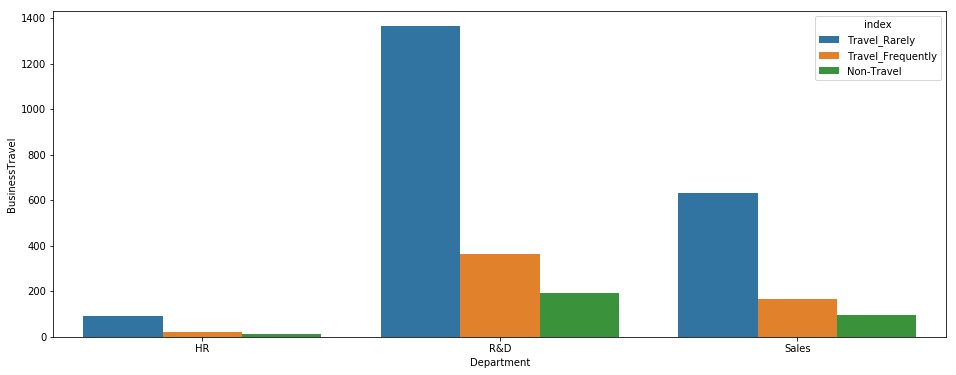

In [392]:
#plotting department data against travel
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df4, hue = 'index')
plt.show()

In [195]:
##Calculating attrition % for each department
#Sales
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])
#attrbydept.reset_index(inplace = True)
attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]
attrbydept

#Insight 2
"""Attrition is highest in Sales team closely followed by HR team"""

,Department,Attrition
0,Sales,20.627803
1,HR,19.047619
2,R&D,13.839750


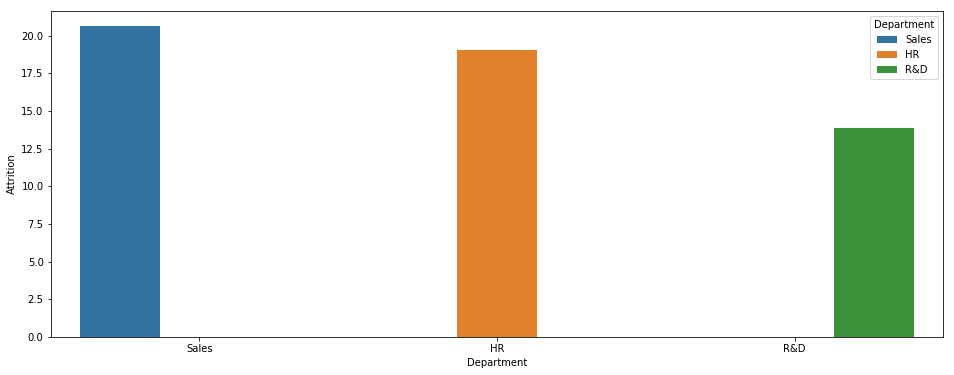

In [197]:
#Plotting Attrition% for each department
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

In [209]:
##Calculating attrition vs EnvironmentSatisfaction level
envsatisfcationgrp = data_cap.groupby(['EnvironmentSatisfaction','Attrition'])
envsatisfcationgrp.groups.keys()



dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [212]:
count = envsatisfcationgrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction', 'Attrition', 'Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [213]:
count = envsatisfcationgrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [214]:
count = envsatisfcationgrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [215]:
count = envsatisfcationgrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


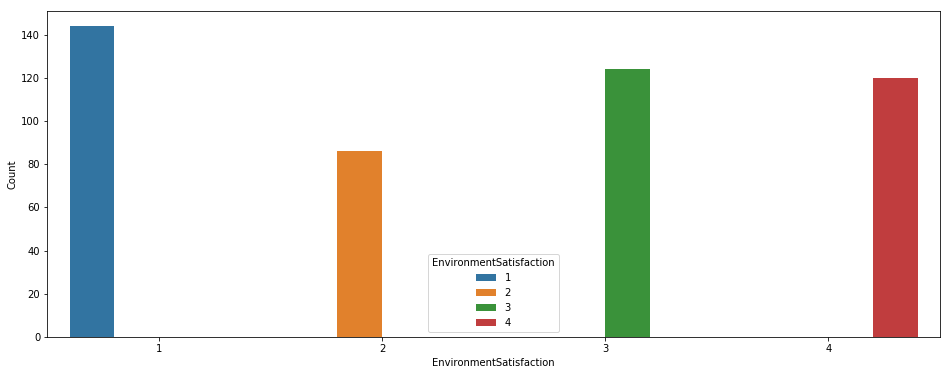

In [217]:
#Plotting Attrition vs Environmentsatisfaction
plt.figure(figsize = (16,6))
sns.barplot(x= 'EnvironmentSatisfaction', y = 'Count' , data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()

#Insight3
"""Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."""

In [219]:
#Attrition by gender
AttrGender = data_cap.groupby(['Attrition', 'Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [220]:
AttrperGend = pd.DataFrame(columns = ['Gender', 'Attrition', 'Count'])
AttrperGend

,Gender,Attrition,Count


In [225]:
count = AttrGender.get_group(('Yes', 'Female'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Female', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174


In [226]:
count = AttrGender.get_group(('Yes', 'Male'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Male', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


In [228]:
data_cap['Gender'].value_counts()
#plt.figure(figsize = (16,6))
#sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')

Male      1764
Female    1176
Name: Gender, dtype: int64

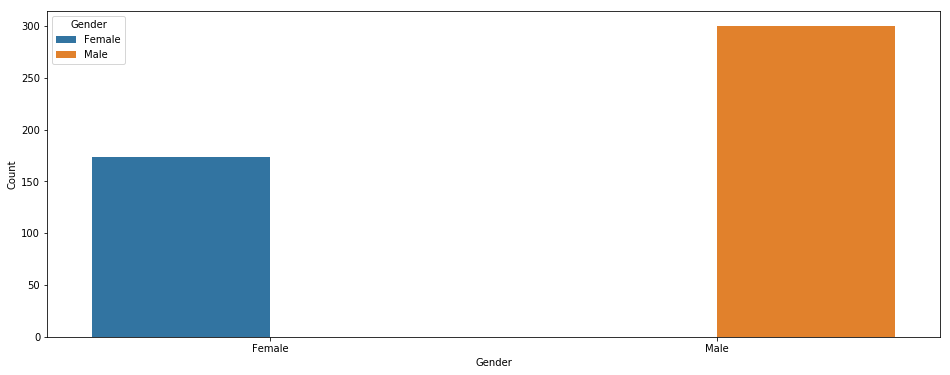

In [227]:
#Plotting Attrition vs Gender
plt.figure(figsize = (16,6))
sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')
plt.show()

#Insight 4
"""Out of total people who have left, Male's have higher attrition numbers"""

In [ ]:
#Attrition by job level

In [233]:
attrbyJoblvl = data_cap.groupby(['JobLevel', 'Attrition'])
attrbyJoblvl.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [268]:
count = attrbyJoblvl.get_group((1, 'Yes'))['Attrition'].count() 
count

286

In [269]:
attrvsJoblvl = pd.DataFrame(columns = ['JobLevel', 'Attrition', 'count', 'Attr%'])
attrvsJoblvl

,JobLevel,Attrition,count,Attr%


In [270]:
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['1', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[1])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175


In [271]:
count = attrbyJoblvl.get_group((2, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['2', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[2])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [272]:
count = attrbyJoblvl.get_group((3, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['3', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[3])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [273]:
count = attrbyJoblvl.get_group((4, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['4', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[4])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [274]:
count = attrbyJoblvl.get_group((5, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['5', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[5])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


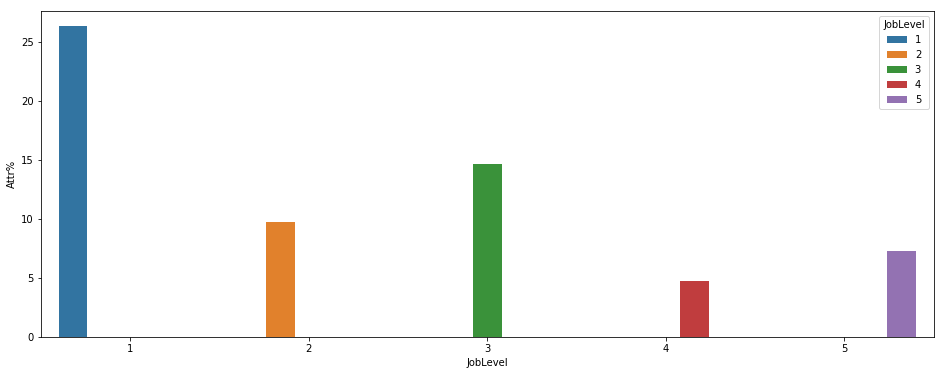

In [277]:
#Plotting Attrition vs Job Level
plt.figure(figsize = (16,6))
sns.barplot(x= 'Attrition', y = 'Attr%' , data = attrvsJoblvl, hue = 'JobLevel')
plt.show()

#Insight 5
"""Attrition % is highest in Job level 1, followed by job level 3"""

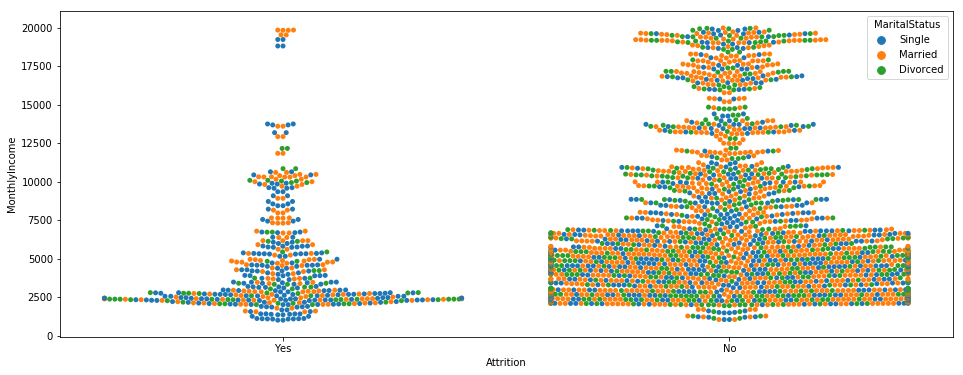

In [282]:
#Plotting Attrition vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = data_cap, hue= 'MaritalStatus')
plt.show()

#Insight 6
"""Attrition is highest amount employees who are earning between (2500-5000)"""


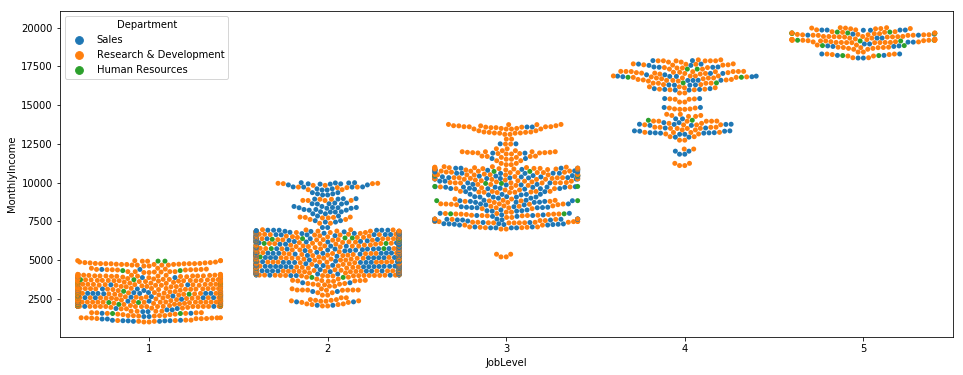

In [286]:
#Plotting Joblevel vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = data_cap, hue= 'Department')
plt.show()

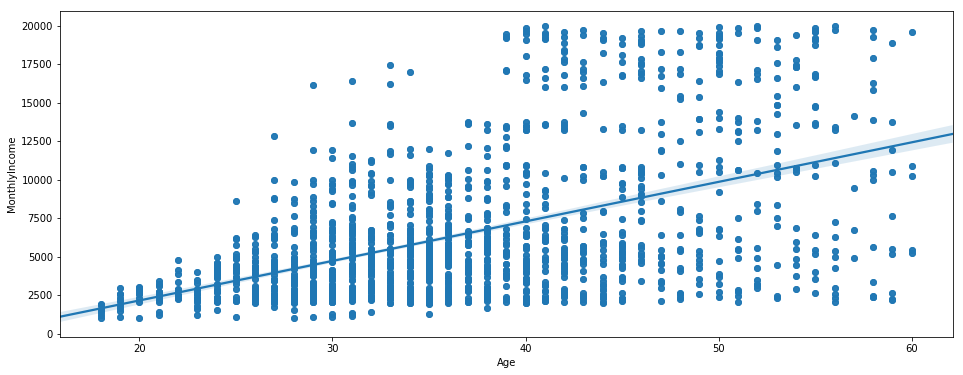

In [288]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = data_cap)
plt.show()

#Insight 7
"""There is a linear relation between Age and Monthly income"""

In [289]:
data_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [292]:
#Analyzing salary hike
data_cap['PercentSalaryHike'].describe()

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

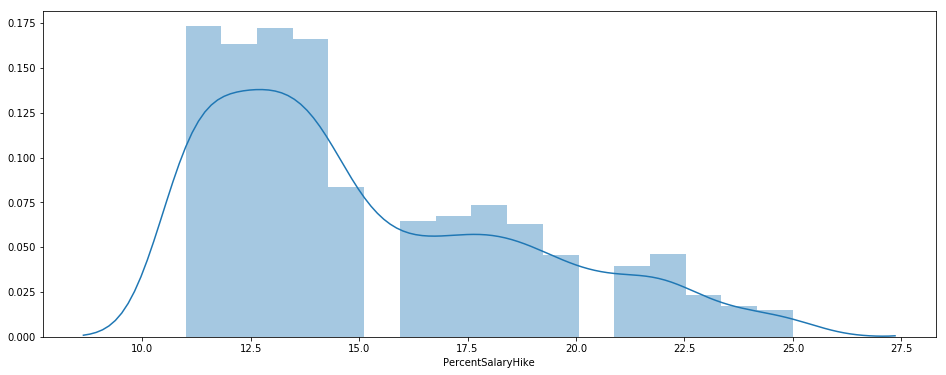

In [298]:
#Plotting histogram of Hike%
plt.figure(figsize = (16,6))
sns.distplot(data_cap['PercentSalaryHike'], kde = True)
plt.show()

#Insight 8
"""The salary hike histogram is skewed to the right""" 

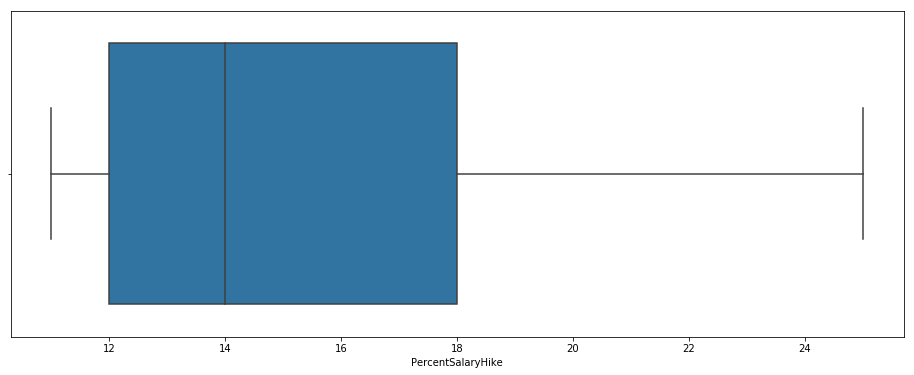

In [294]:
#Plotting box plot for salary hike
plt.figure(figsize = (16,6))
sns.boxplot('PercentSalaryHike', data = data_cap)
plt.show()

#Insight 8
"""The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%""" 

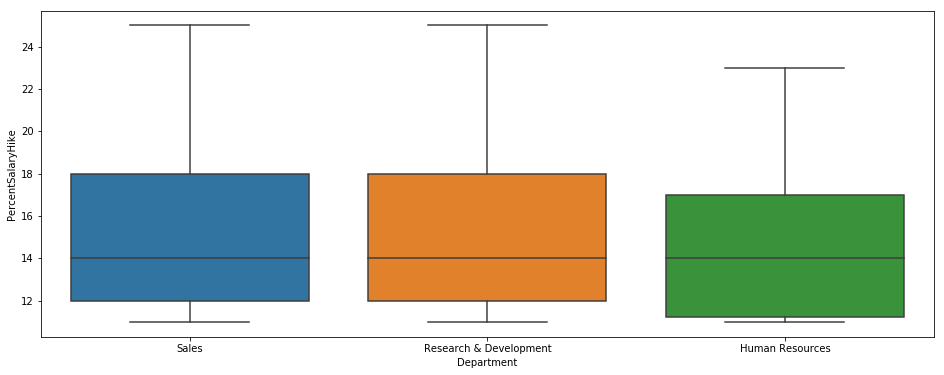

In [295]:
#Plotting hike% for each department
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = data_cap)
plt.show()

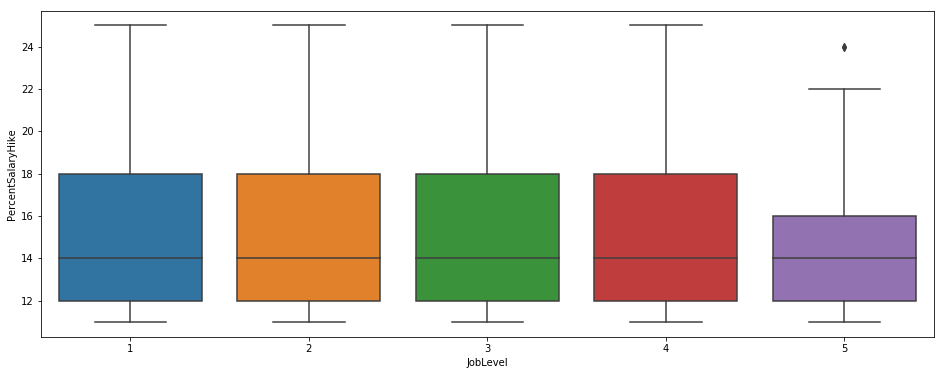

In [299]:
#Plotting hike% for each job level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobLevel', data = data_cap)
plt.show()

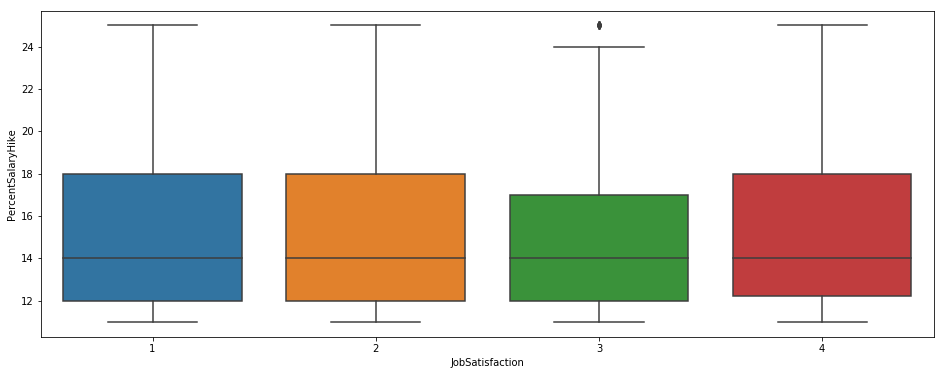

In [301]:
#Plotting hike% for each job satisfaction level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobSatisfaction', data = data_cap)
plt.show()

In [339]:
grp2 = data_cap.groupby(['JobSatisfaction', 'Attrition'])
grp2.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [351]:
count = grp2.get_group((1, 'Yes'))['Attrition'].count()
count

132

In [353]:
attrbyJobsat = pd.DataFrame(columns = ['Jobsat','Attrition','Count', 'Attr%'])
attrbyJobsat.loc[len(attrbyJobsat)] = ['1', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[1]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.83737


In [354]:
count = grp2.get_group((2, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['2', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[2]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571


In [355]:
count = grp2.get_group((3, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['3', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[3]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837


In [356]:
count = grp2.get_group((4, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['4', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[4]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837
3,4,Yes,104,11.328976


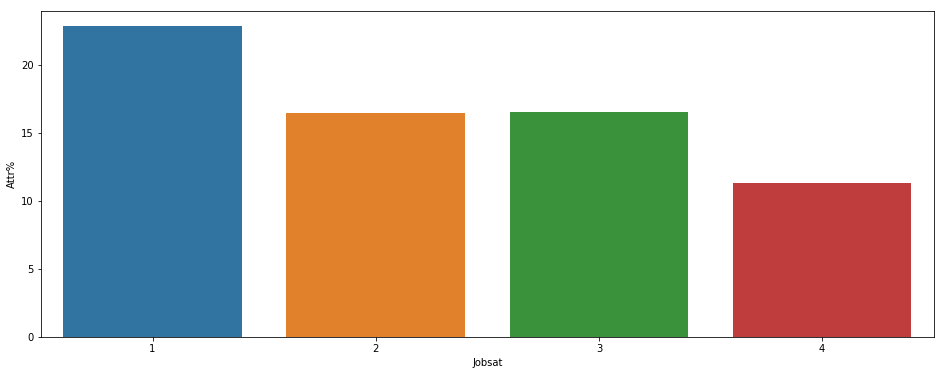

In [359]:
#Plotting Attr% for Job satisfaction level
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Jobsat', data = attrbyJobsat)
plt.show()

#Insight 9
"""employees with job satisfaction level of 1 have the highest attrition % of 22.8%""" 

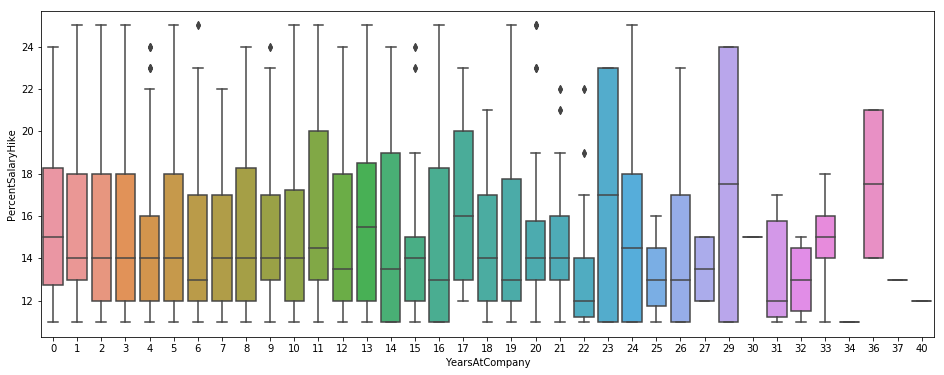

In [305]:
#Plotting hike% for No of years worked
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'YearsAtCompany', data = data_cap)
plt.show()

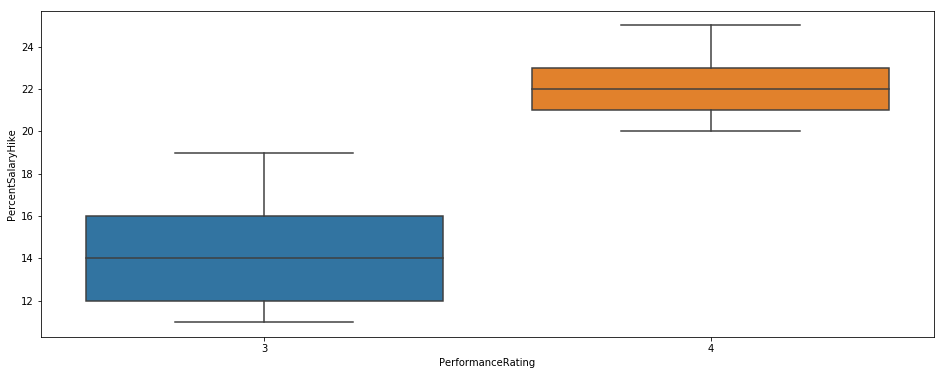

'employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 jave got between (11-19)'

In [317]:
#Plotting 'Performance rating' and 'hike%'
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = data_cap)
plt.show()

#Insight 10
"""employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)""" 

In [330]:
grp1 = data_cap.groupby(['RelationshipSatisfaction', 'Attrition'])
grp1.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [365]:
count = grp1.get_group((1, 'Yes'))['Attrition'].count()
count

114

In [366]:
attrbyrelsat = pd.DataFrame(columns = ['Relsat', 'Attrition', 'Count', 'Attr%'])
attrbyrelsat

,Relsat,Attrition,Count,Attr%


In [367]:
attrbyrelsat.loc[len(attrbyrelsat)] = ['1', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[1]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174


In [368]:
count = grp1.get_group((2, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['2', 'Yes', count,count/data_cap['RelationshipSatisfaction'].value_counts()[2]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485


In [369]:
count = grp1.get_group((3, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['3', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[3]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410


In [370]:
count = grp1.get_group((4, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['4', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[4]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410
3,4,Yes,128,14.814815


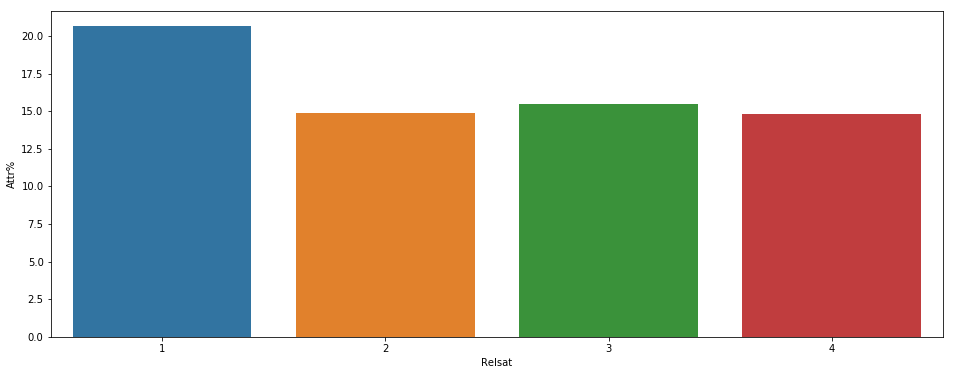

'employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.'

In [372]:
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Relsat', data = attrbyrelsat)
plt.show()

#Insight 11
"""employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.""" 

# Data preprocessing

In [102]:
#Checking for unwanted columns
print("EmployeeCount unique values::", data_cap['EmployeeCount'].unique())
print("Over18 unique values::",data_cap['Over18'].unique())
print("StandardHours unique values::",data_cap['StandardHours'].unique())
#There is only one value for above column hence dropping it as they will not affect our model


EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [103]:
data_cap.drop(columns = ['EmployeeCount', 'Over18','StandardHours'], inplace = True)

In [104]:
data_cap.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [105]:
data_cap.shape

(2940, 32)

### Converting labels to nominal data

In [106]:
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np

In [107]:
def labelencoder(df):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df["Attrition"] = le.fit_transform(temp_df["Attrition"])
    temp_df["BusinessTravel"] = le.fit_transform(temp_df["BusinessTravel"])
    temp_df["Department"] = le.fit_transform(temp_df["Department"])
    temp_df["EducationField"] = le.fit_transform(temp_df["EducationField"])
    temp_df["Gender"] = le.fit_transform(temp_df["Gender"])
    temp_df["JobRole"] = le.fit_transform(temp_df["JobRole"])
    temp_df["MaritalStatus"] = le.fit_transform(temp_df["MaritalStatus"])
    temp_df["OverTime"] = le.fit_transform(temp_df["OverTime"])
    return temp_df

encoded_cap_data = labelencoder(data_cap)


In [108]:
encoded_cap_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,...,3,4,1,6,3,3,2,2,2,2


In [109]:
#Segregating the Independent and the dependant variable
y = encoded_cap_data["Attrition"].values
X = encoded_cap_data.drop(["Attrition"],axis =1)

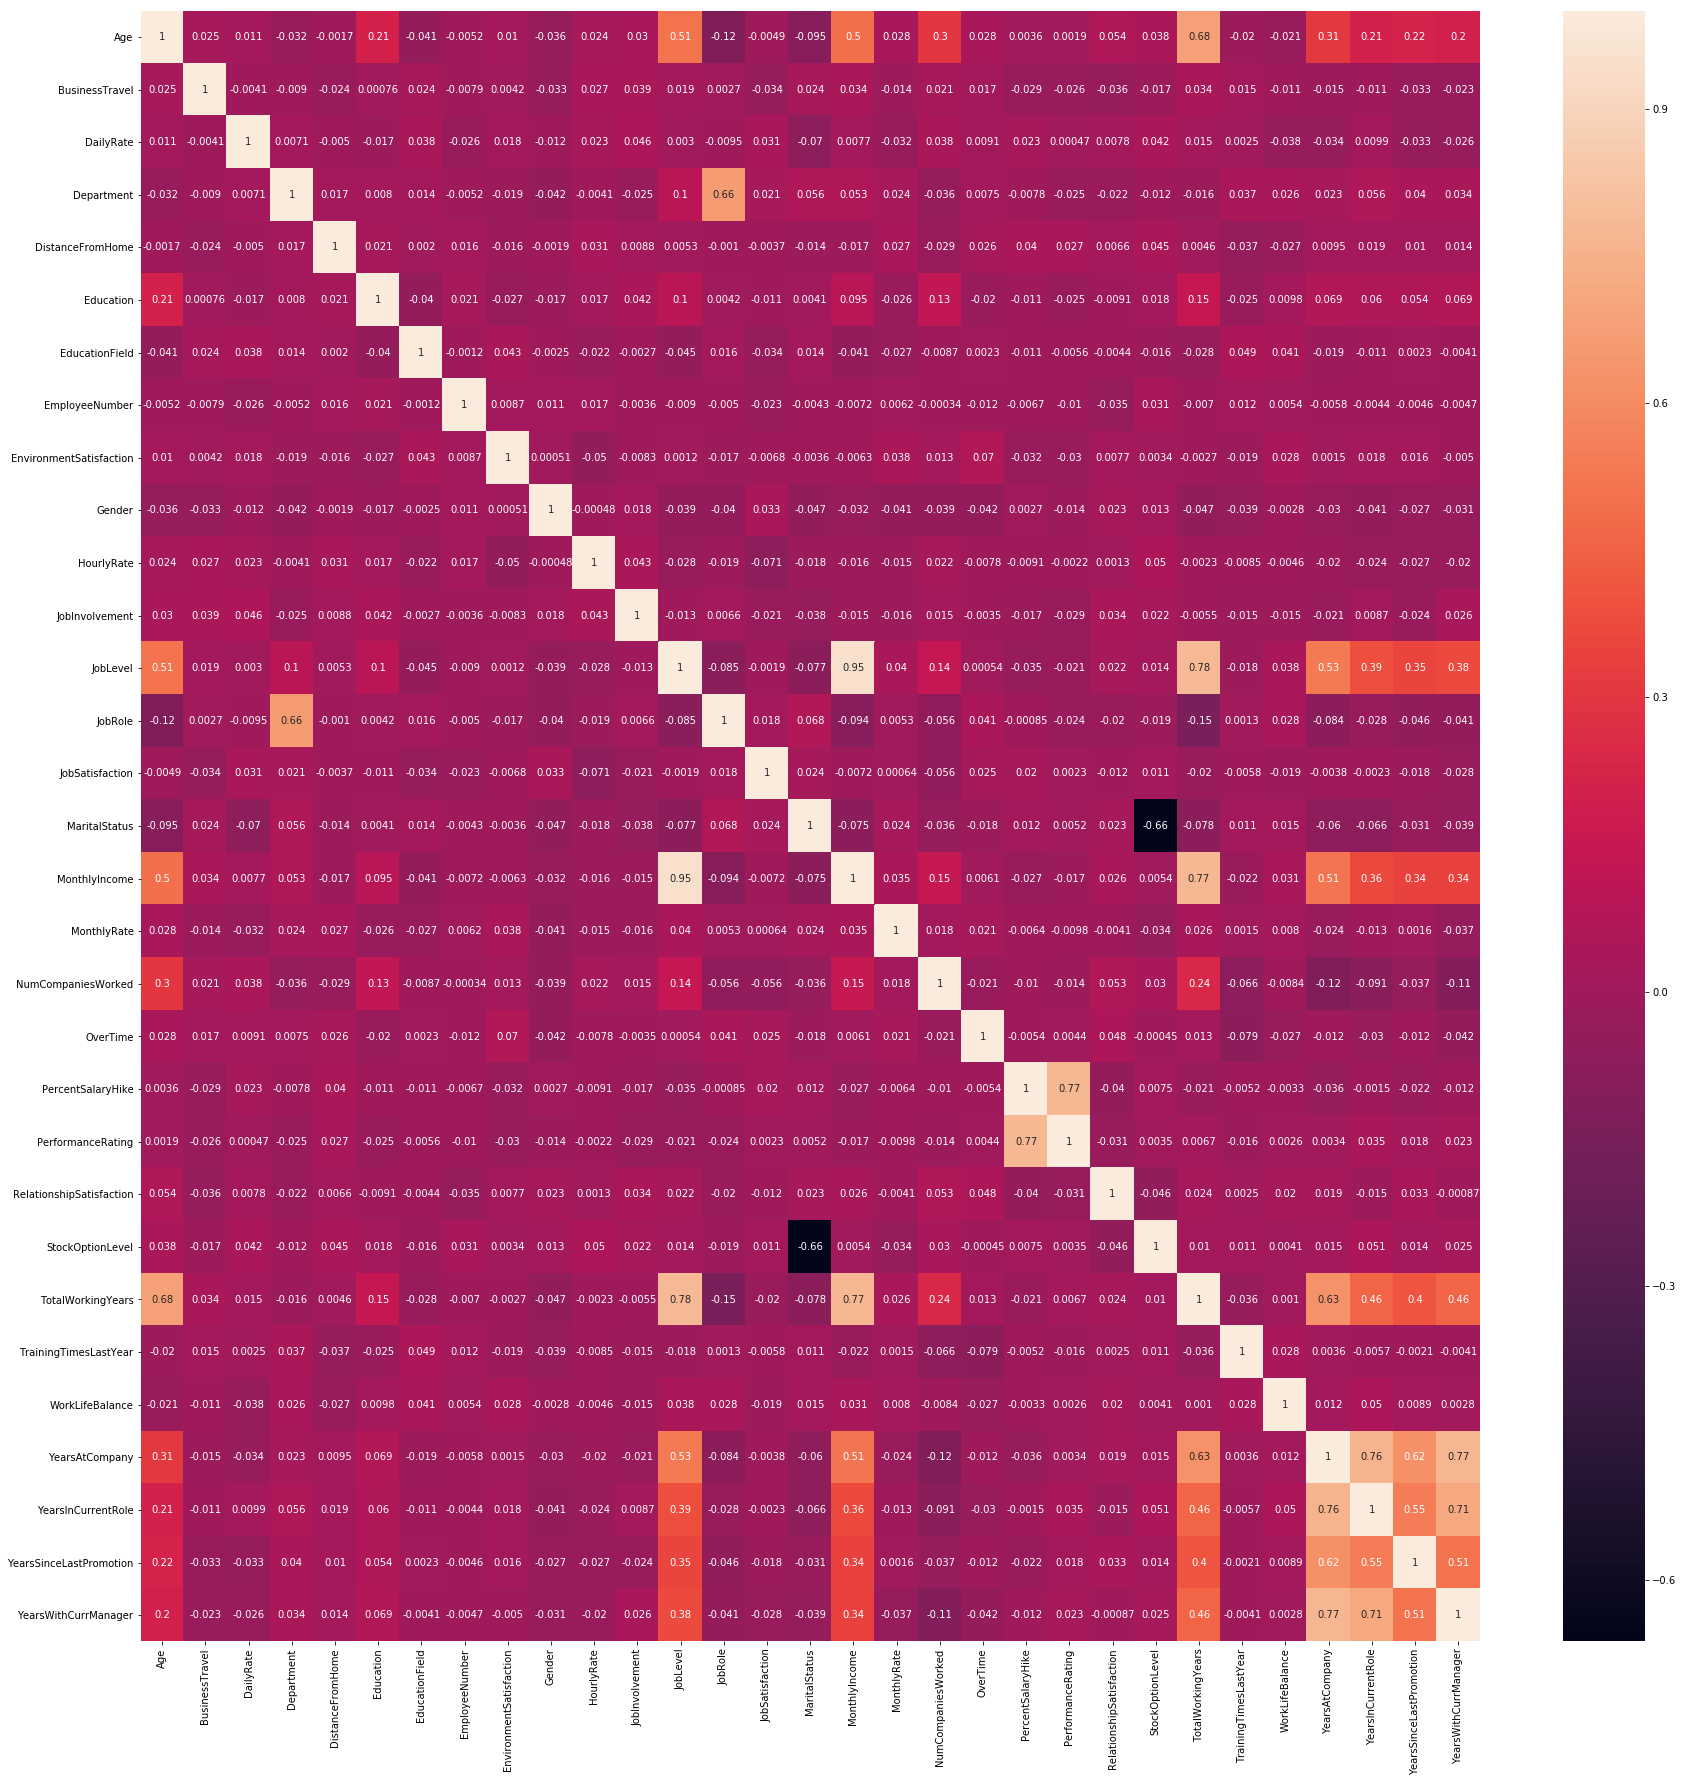

In [110]:
#checking for correlation
plt.figure(figsize = (30,30))
correlation = X.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()
#correlation

In [111]:
#Dropping columns which have correlation > 75%. 
#The columns are selected based on the importantance which we got from random forest classification.
#Dropping Monthly income, percent salary hike, Total working years, Years at company,years in current role
X.columns.tolist()

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [115]:
X.drop(columns = ['MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole'],inplace = True)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,19479,8,1,3,1,0,0,1,0,5
1,49,1,279,1,8,1,1,2,3,1,...,24907,1,0,4,4,1,3,3,1,7
2,37,2,1373,1,2,2,4,3,4,1,...,2396,6,1,3,2,0,3,3,0,0
3,33,1,1392,1,3,4,1,4,4,0,...,23159,1,1,3,3,0,3,3,3,0
4,27,2,591,1,2,1,3,5,1,1,...,16632,9,0,3,4,1,3,3,2,2
5,32,1,1005,1,2,2,1,6,4,1,...,11864,0,0,3,3,0,2,2,3,6
6,59,2,1324,1,3,3,3,7,3,0,...,9964,4,1,4,1,3,3,2,0,0
7,30,2,1358,1,24,1,1,8,4,1,...,13335,1,0,4,2,1,2,3,0,0
8,38,1,216,1,23,3,1,9,4,1,...,8787,0,0,4,2,0,2,3,1,8
9,36,2,1299,1,27,3,3,10,3,1,...,16577,6,0,3,2,2,3,2,7,7


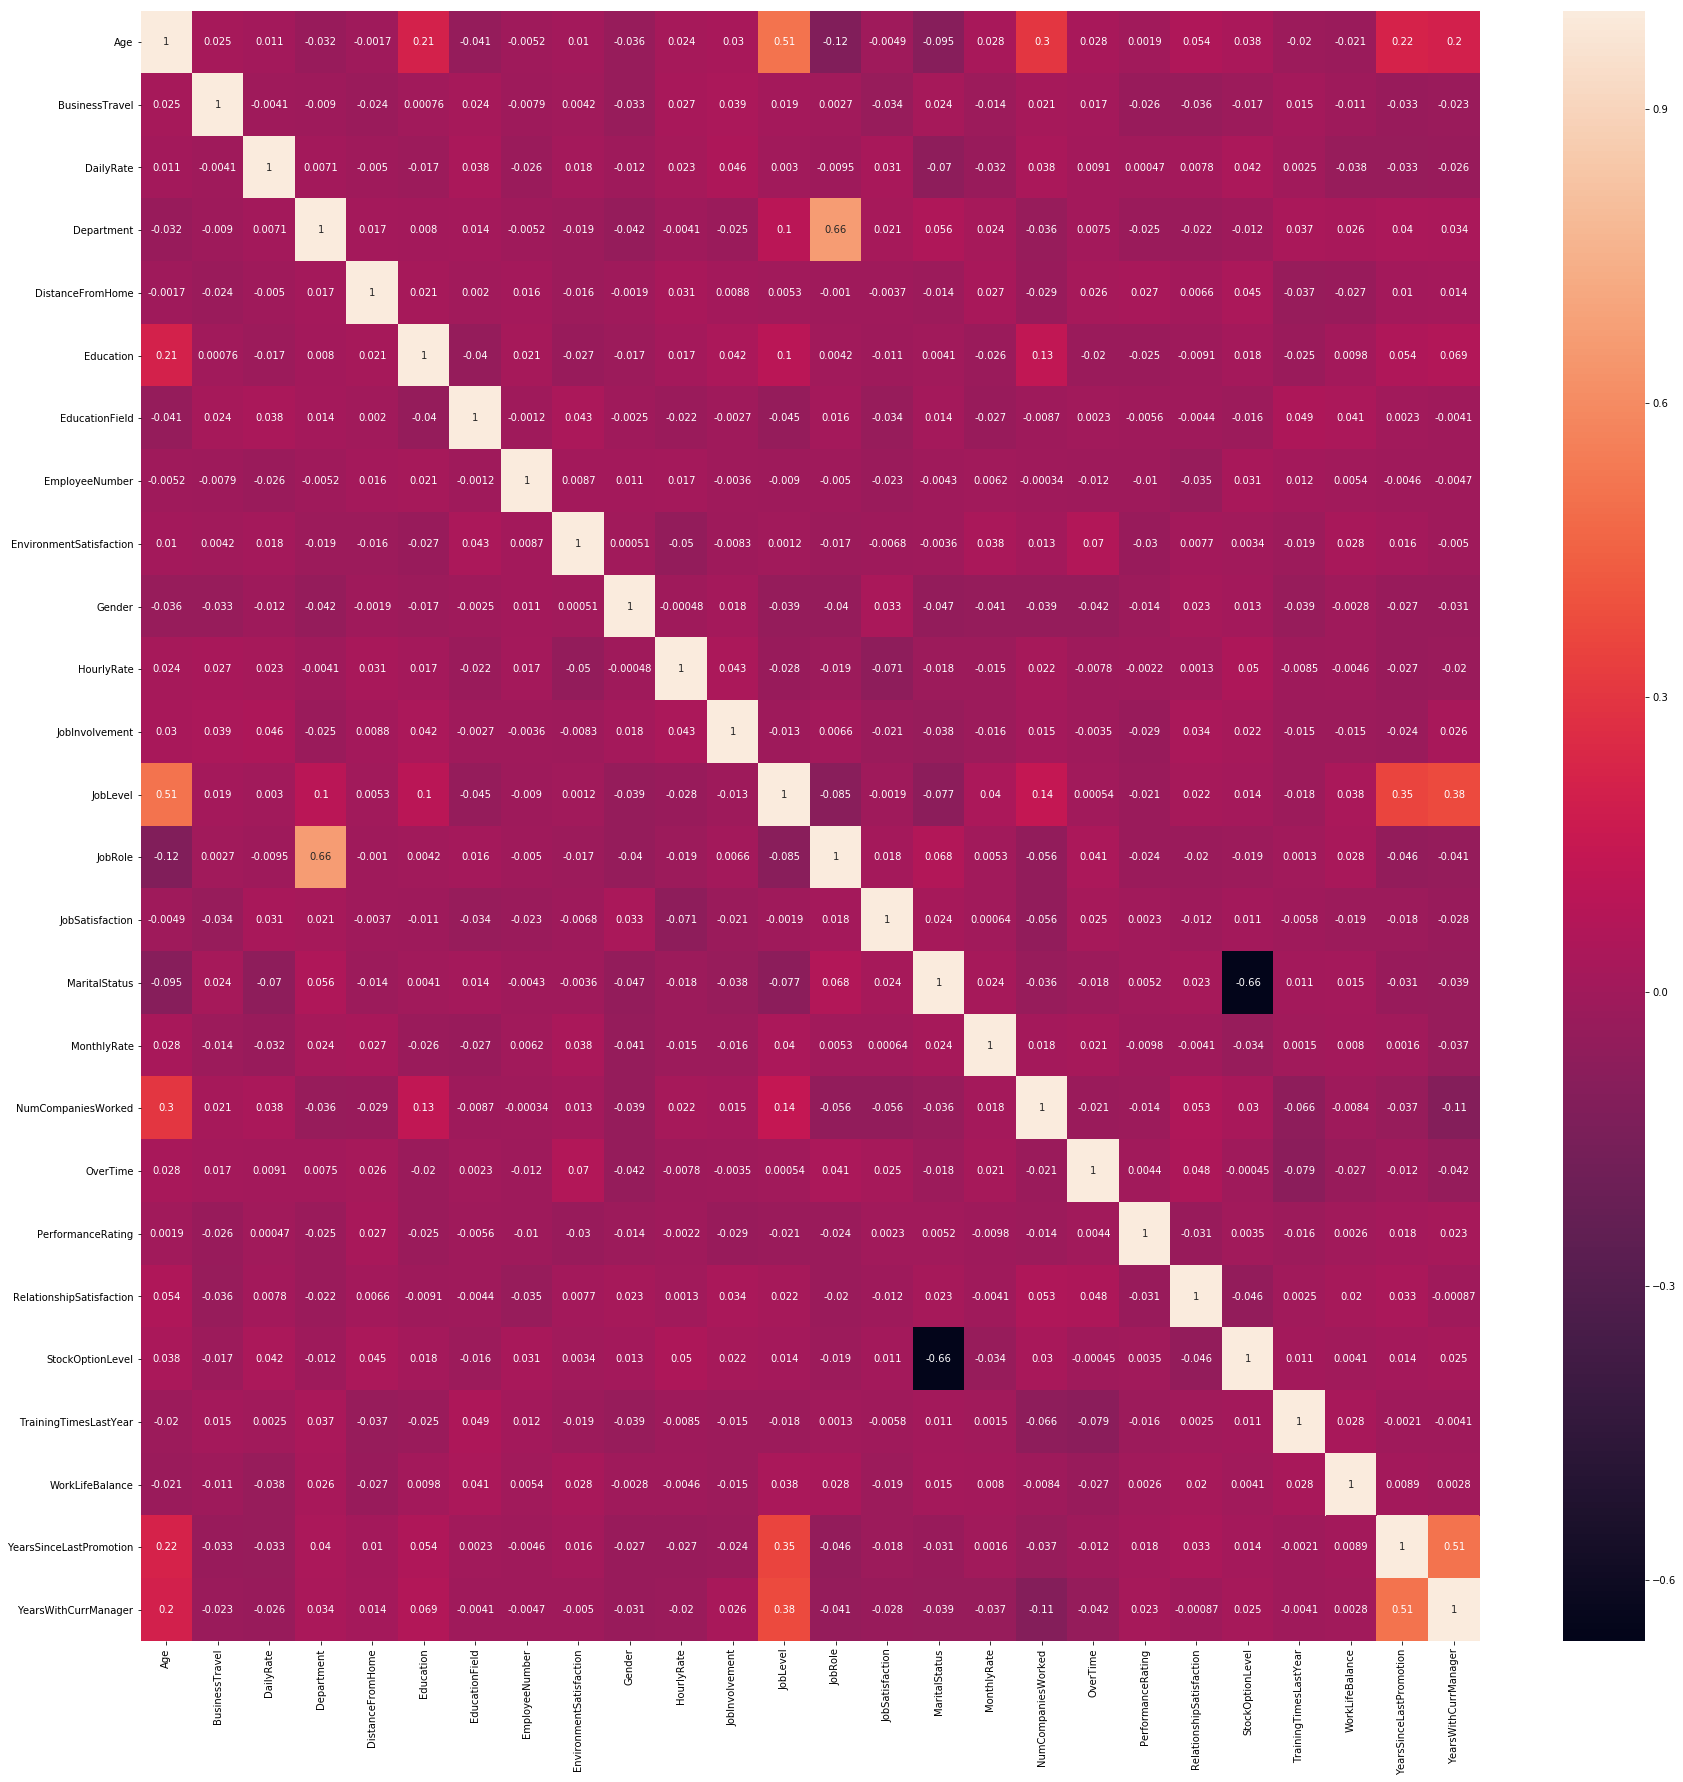

In [116]:
plt.figure(figsize = (30,30))
correlation = X.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

In [118]:
X_train.shape

(2352, 26)

In [119]:
#Scaling of features
sc = StandardScaler()
X = sc.fit_transform(X)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [121]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [123]:
#Build the logistic regression model.
model_HR = LogisticRegression()
model_HR.fit(X_train, y_train)
model_HR_score_train = model_HR.score(X_train, y_train)
print("Training score: ",model_HR_score_train)
model_HR_score_test = model_HR.score(X_test, y_test)
print("Testing score: ",model_HR_score_test)

Training score:  0.8754251700680272
Testing score:  0.8673469387755102


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
#caluclating the probabilities for the AUC curve
#Decision treemodel_dt_2
y_pred_prob = model_HR.predict_proba(X_test)[:, 1]
y_pred_prob

array([7.00601992e-01, 1.14281623e-01, 1.45958045e-01, 1.77403035e-01,
       2.57934715e-01, 2.69967009e-01, 1.44391301e-01, 7.62139367e-03,
       1.01506172e-01, 1.04196796e-01, 6.04156143e-02, 2.52905353e-02,
       5.96494611e-02, 5.90964908e-01, 1.54938199e-01, 1.36142099e-01,
       3.30890445e-03, 8.63839514e-04, 9.94185124e-02, 1.40345899e-02,
       4.24229912e-02, 1.01902886e-01, 3.16306428e-02, 6.24604270e-03,
       3.81844070e-02, 7.82596199e-02, 6.16446318e-02, 1.82660299e-02,
       3.98362800e-01, 1.10377000e-01, 1.13866061e-01, 2.19898410e-02,
       3.36627718e-02, 3.66911950e-02, 3.56877365e-01, 4.25137572e-01,
       9.46561070e-02, 4.85112571e-02, 9.32712326e-01, 4.97933275e-01,
       3.18605855e-01, 2.08492137e-02, 1.48401310e-01, 9.31992642e-03,
       8.91450685e-03, 3.07101911e-01, 2.42840012e-01, 3.99559011e-01,
       3.71027671e-03, 5.77966375e-01, 4.13585079e-01, 3.71287726e-02,
       2.94936075e-02, 2.45463769e-01, 4.34569148e-01, 9.19055411e-02,
      

In [125]:
#Predicting the Attrition for X_test
y_pred = model_HR.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Performance metrics

In [126]:
# Model Accuracy:
print ("Model Accuracy is::", (model_HR.score(X_test, y_test))*100)
# Recall
print("Model recall is::", (recall_score(y_test, y_pred))*100)

Model Accuracy is:: 86.73469387755102
Model recall is:: 36.79245283018868


In [127]:
#Area under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

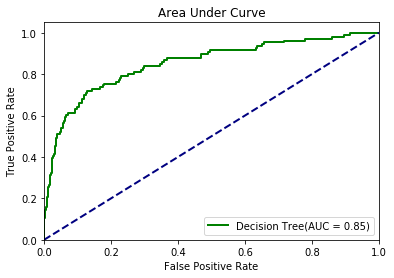

In [128]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [129]:
#Printing confusion matrix
print (confusion_matrix(y_test, y_pred))

[[471  11]
 [ 67  39]]


In [130]:
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

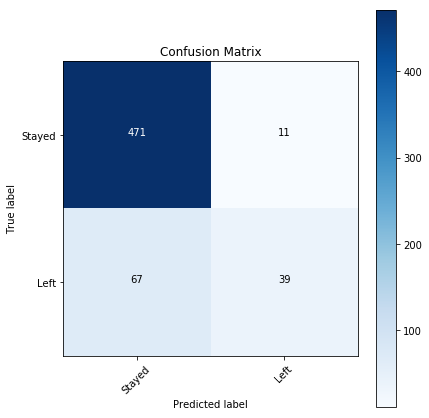

In [131]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()